# Machine Learning Model build up for a Binary Classification containing Machine Failure dataset


<img src="https://github.com/pathakchiranjit/Machine-Learning/blob/main/Classification/Machine_Failure/Pics/predictive_model.jpg?raw=true" />


As Industry 4.0 continues to generate media attention, many companies are struggling with the realities of AI implementation. Indeed, the benefits of predictive maintenance such as helping determine the condition of equipment and predicting when maintenance should be performed, are extremely strategic. Needless to say that the implementation of ML-based solutions can lead to major cost savings, higher predictability, and the increased availability of the systems.

<img src="https://github.com/pathakchiranjit/Machine-Learning/blob/main/Classification/Machine_Failure/Pics/prediction.png?raw=true"/>

---

In predictive maintenance scenarios, data is collected over time to monitor the state of equipment. The goal is to find patterns that can help predict and ultimately prevent failures.

<img src="https://github.com/pathakchiranjit/Machine-Learning/blob/main/Classification/Machine_Failure/Pics/reliable%20plant.gif?raw=true"/>

<img src="https://github.com/pathakchiranjit/Machine-Learning/blob/main/Classification/Machine_Failure/Pics/ptof1.png?raw=true"/>

## Table of Contents

1. [Problem Statement](#section1)<br>

2. [Data Loading and Description](#section2)<br>

3. [Preprocessing](#section3)<br>
    - 3.1 [Importing packages](#section301)<br>
    - 3.2 [Label Encoding for Categorical data](#section302)<br>
    - 3.3 [Binary Class Identification : Imbalanced dataset](#section303)<br>
    - 3.4 [Feature Corelations](#section304)<br>

4. [Handling Imbalanced data](#section4)<br>
    - 4.1 [Train & Test split](#section401)<br>
    - 4.2 [SMOTE : Oversampling technique adopted on Train data](#section402)<br>

5. [Neural Network](#section5)<br>
    - 5.1 [Build Model](#section501)<br>
    - 5.2 [Prediction using Model](#section502)<br> 
    - 5.3 [Model Evaluation](#section503)<br> 
  
6. [Logistic Regression](#section6)<br>
    - 6.1 [Build Model](#section601)<br>
    - 6.2 [Prediction using Model](#section602)<br> 
    - 6.3 [Model Evaluation](#section603)<br> 
    
7. [Decision Tree : Gini](#section7)<br>
    - 7.1 [Build Model](#section701)<br>
    - 7.2 [Prediction using Model](#section702)<br> 
    - 7.3 [Model Evaluation](#section703)<br>
	
8. [Decision Tree : Entropy](#section8)<br>
    - 8.1 [Build Model](#section801)<br>
    - 8.2 [Prediction using Model](#section802)<br> 
    - 8.3 [Model Evaluation](#section803)<br>
	
9. [Random Forest : Gini](#section9)<br>
    - 9.1 [Build Model](#section901)<br>
    - 9.2 [Prediction using Model](#section902)<br> 
    - 9.3 [Model Evaluation](#section903)<br>
	
10. [Random Forest : Entropy](#section10)<br>
    - 10.1 [Build Model](#section1001)<br>
    - 10.2 [Prediction using Model](#section1002)<br> 
    - 10.3 [Model Evaluation](#section1003)<br>
	
11. [Decision Tree with Class weight and Entropy](#section11)<br>
    - 11.1 [Build Model](#section1101)<br>
    - 11.2 [Prediction using Model](#section1102)<br> 
    - 11.3 [Model Evaluation](#section1103)<br>
	
12. [RandomSearchCV on RF](#section12)<br>
    - 12.1 [Build Model](#section1201)<br>
    - 12.2 [Prediction using Model](#section1202)<br> 
    - 12.3 [Model Evaluation](#section1203)<br>
	
13. [Model Evaluation among all the employed model](#section13)<br>
    - 13.1 [Precision-Recall Curve and Classification Report](#section1301)<br>
    - 13.2 [ROC-AUC Curve and compare against no skill model](#section1302)<br>
    - 13.3 [Probability Value comparison of test dataset among all models](#section1303)<br>
	
14. [Cross Validation and Prediction with selected model](#section14)<br>

15. [Conclusion](#section15)<br>

### 1. Problem Statement

The goal is to __predict failure__ of __machine__ using __different classification models__.

### 2. Data Loading and Description

Source of the data:

https://bigml.com/user/czuriaga/gallery/dataset/587d062d49c4a16936000810

- The dataset consists of the information about all operating parameters including Operator information also. 
- The dataset comprises of __8,784 observations of 28 columns__. Below is a table showing names of all the columns and their description.

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Date          | Date, time of recording data in 1 hr interval                                    | 
| Temperature   | Temperature of atmosphere                                               |  
| Humidity      | Humidity of atmosphere                                           | 
| Operator      | Operator number                                         |   
| Measure 1 to 15| Parameters captured                                          |
| Hours Since Previous Failure           | hrs. from last failure                                          |
| Failure         | failure happened - Yes or No |
| Date.year,month,day,hrs,min,sec         | date-time parameters in detail|

### 3. Preprocessing

#### 3.1 Importing packages                                          

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns                                       
%matplotlib inline
sns.set()
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()
'''
import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output
'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


"\nimport warnings\nwarnings.filterwarnings('ignore')\n\nfrom subprocess import check_output\n"

In [ ]:
file1="https://raw.githubusercontent.com/pathakchiranjit/Machine-Learning/main/Classification/Machine_Failure/Dataset/machine_failure_data.csv"
df_all = pd.read_csv(file1)  # (encoding='ISO-8859-1',sep="|") not required here
df_all.head(3)

,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,﻿Date.year,﻿Date.month,﻿Date.day-of-month,﻿Date.day-of-week,﻿Date.hour,﻿Date.minute,﻿Date.second
0,2016-01-01 00:00:00,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,No,2016,1,1,5,0,0,0
1,2016-01-01 01:00:00,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,No,2016,1,1,5,1,0,0
2,2016-01-01 02:00:00,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,No,2016,1,1,5,2,0,0


In [ ]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(df_all)

,Total,Percent
﻿Date.second,0,0.0
﻿Date.minute,0,0.0
Temperature,0,0.0
Humidity,0,0.0
Operator,0,0.0
Measure1,0,0.0
Measure2,0,0.0
Measure3,0,0.0
Measure4,0,0.0
Measure5,0,0.0


In [ ]:
#!pip install -U dtale

In [ ]:
'''
import dtale
import pandas as pd
import dtale.app as dtale_app

dtale_app.USE_COLAB = True
'''

'\nimport dtale\nimport pandas as pd\nimport dtale.app as dtale_app\n\ndtale_app.USE_COLAB = True\n'

In [ ]:
#df = df_all.copy()

In [ ]:
#dtale.show(df, ignore_duplicate=True)

In [ ]:
data = df_all.copy()

In [ ]:
data.columns

Index(['Date', 'Temperature', 'Humidity', 'Operator', 'Measure1', 'Measure2',
       'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8',
       'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13',
       'Measure14', 'Measure15', 'Hours Since Previous Failure', 'Failure',
       '﻿Date.year', '﻿Date.month', '﻿Date.day-of-month', '﻿Date.day-of-week',
       '﻿Date.hour', '﻿Date.minute', '﻿Date.second'],
      dtype='object')

In [ ]:
data.drop(data.columns[[0, 21, 22,23,24,25,26,27]], axis = 1, inplace = True)
data.head(3)

,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure
0,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,No
1,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,No
2,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,No


In [ ]:
data.columns

Index(['Temperature', 'Humidity', 'Operator', 'Measure1', 'Measure2',
       'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8',
       'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13',
       'Measure14', 'Measure15', 'Hours Since Previous Failure', 'Failure'],
      dtype='object')

In [ ]:
order =['No', 'Yes']

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(order)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [ ]:
#from sklearn.preprocessing import LabelEncoder
data['Target_label_encoded']= lb.fit_transform(data.Failure)
data.drop(['Failure'], axis=1,inplace=True)
data.head(3)

,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Target_label_encoded
0,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,0
1,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,0
2,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,0


In [ ]:
data_with_dummies = pd.get_dummies(data, columns=['Operator'], drop_first=True)
data_with_dummies.head()

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Target_label_encoded,Operator_Operator2,Operator_Operator3,Operator_Operator4,Operator_Operator5,Operator_Operator6,Operator_Operator7,Operator_Operator8
0,67,82,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,0,0,0,0,0,0,0,0
1,68,77,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,0,0,0,0,0,0,0,0
2,64,76,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,0,0,0,0,0,0,0,0
3,63,80,550,1,1,1754,1834,1413,1151,945,1312,1494,1755,1434,502,1336,711,93,0,0,0,0,0,0,0,0
4,65,81,1928,1,2,1326,1082,233,1441,1736,1033,1549,802,1819,1616,1507,507,94,0,0,0,0,0,0,0,0


In [ ]:
data_with_dummies.columns

Index(['Temperature', 'Humidity', 'Measure1', 'Measure2', 'Measure3',
       'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8', 'Measure9',
       'Measure10', 'Measure11', 'Measure12', 'Measure13', 'Measure14',
       'Measure15', 'Hours Since Previous Failure', 'Target_label_encoded',
       'Operator_Operator2', 'Operator_Operator3', 'Operator_Operator4',
       'Operator_Operator5', 'Operator_Operator6', 'Operator_Operator7',
       'Operator_Operator8'],
      dtype='object')

In [ ]:
columns = ['Temperature', 'Humidity', 'Measure1', 'Measure2', 'Measure3',
       'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8', 'Measure9',
       'Measure10', 'Measure11', 'Measure12', 'Measure13', 'Measure14',
       'Measure15', 'Hours Since Previous Failure', 'Target_label_encoded',
       'Operator_Operator2', 'Operator_Operator3', 'Operator_Operator4',
       'Operator_Operator5', 'Operator_Operator6', 'Operator_Operator7',
       'Operator_Operator8']


In [ ]:
col=[]
for c in columns:
    if c != 'Target_label_encoded':
      col.append(c)
target = 'Target_label_encoded'
X=data_with_dummies[col]
y=data_with_dummies[target]
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (8784, 25)
Shape of y: (8784,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)

In [ ]:
X_test.shape

(1757, 25)

In [ ]:
df_trainX = pd.DataFrame(X_train)
df_trainy = pd.DataFrame (y_train)
df_testX = pd.DataFrame(X_test)
df_testy = pd.DataFrame (y_test)

In [ ]:
continuous_cols = ['Temperature', 'Humidity', 'Measure1', 'Measure2',
       'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8',
       'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13',
       'Measure14', 'Measure15', 'Hours Since Previous Failure']

In [ ]:
#from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler


In [ ]:
'''
mapper = DataFrameMapper([([continuous_col], StandardScaler()) for continuous_col in continuous_cols] +
  [(categorical_col, LabelBinarizer()) for categorical_col in categorical_cols])
  '''

'\nmapper = DataFrameMapper([([continuous_col], StandardScaler()) for continuous_col in continuous_cols] +\n  [(categorical_col, LabelBinarizer()) for categorical_col in categorical_cols])\n  '

In [ ]:
'''
X_train_enc = pd.DataFrame(np.round(mapper.fit_transform(X_train), 2), columns = col)
X_test_enc = pd.DataFrame(np.round(mapper.fit_transform(X_test), 2), columns = col)
'''

'\nX_train_enc = pd.DataFrame(np.round(mapper.fit_transform(X_train), 2), columns = col)\nX_test_enc = pd.DataFrame(np.round(mapper.fit_transform(X_test), 2), columns = col)\n'

In [ ]:
features_train = df_trainX.copy()
features_test = df_testX.copy()

In [ ]:
col_names = continuous_cols
features_train = df_trainX[col_names]
features_test = df_testX[col_names]

In [ ]:
scaler_tr = StandardScaler().fit(features_train.values)
features_train = scaler_tr.transform(features_train.values)
scaled_features_train = pd.DataFrame(features_train, columns = col_names)

In [ ]:
scaler_tst = StandardScaler().fit(features_test.values)
features_test = scaler_tst.transform(features_test.values)
scaled_features_test = pd.DataFrame(features_test, columns = col_names)

In [ ]:
df_trainX[col_names] = features_train
df_testX[col_names] = features_test

In [ ]:
df_testX.head(3)

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Operator_Operator2,Operator_Operator3,Operator_Operator4,Operator_Operator5,Operator_Operator6,Operator_Operator7,Operator_Operator8
5412,1.098370,0.813179,-1.335798,1.369168,1.267832,0.318688,0.108092,-0.727298,1.343247,-0.082581,-0.622898,0.047636,0.890168,1.036932,-1.296467,1.330755,0.111555,0.485502,0,1,0,0,0,0,0
1539,-0.388407,-0.272666,-0.195731,0.474217,1.267832,0.850712,-1.067862,1.009396,-0.793944,1.342784,0.178221,1.662228,-1.346279,0.123582,1.255133,-1.021571,-1.299758,1.359586,1,0,0,0,0,0,0
6651,-0.016712,1.899024,1.282969,1.369168,1.267832,-0.000902,0.859869,-1.685863,-1.620100,-0.865789,1.664384,-1.081118,0.677706,-0.507460,-1.631011,-0.808900,-0.498294,-0.130330,1,0,0,0,0,0,0


In [ ]:
df_testX.shape

(1757, 25)

#### 3.2 Label Encoding for Categorical data                                          

In [ ]:
'''
from sklearn.preprocessing import LabelEncoder
data['Target_label_encoded']= LabelEncoder().fit_transform(data.Failure)
data.drop(['Failure'], axis=1,inplace=True)
data.head(3)
'''

"\nfrom sklearn.preprocessing import LabelEncoder\ndata['Target_label_encoded']= LabelEncoder().fit_transform(data.Failure)\ndata.drop(['Failure'], axis=1,inplace=True)\ndata.head(3)\n"

In [ ]:
'''
data_with_dummies = pd.get_dummies(data, columns=['Operator'], drop_first=True)
data_with_dummies.head()
'''

"\ndata_with_dummies = pd.get_dummies(data, columns=['Operator'], drop_first=True)\ndata_with_dummies.head()\n"

In [ ]:
columns = data_with_dummies.columns.tolist()
range(len(columns))
columns[2]

'Measure1'

In [ ]:
columns = data_with_dummies.columns.tolist()
col=[]
for c in columns:
    if c != 'Target_label_encoded':
      col.append(c)
target ='Target_label_encoded'
X=data_with_dummies[col]
y=data_with_dummies[target]
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (8784, 25)
Shape of y: (8784,)


#### 3.3 Binary Class Identification : Imbalanced dataset                                          

0    8703
1    81  
Name: Target_label_encoded, dtype: int64

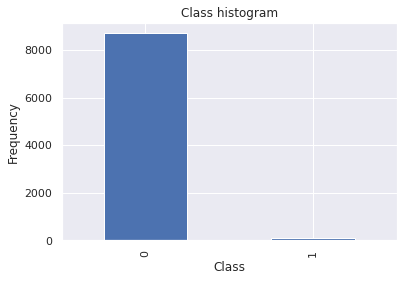

In [ ]:
pd.value_counts(y).plot.bar()
plt.title('Class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
y.value_counts()

Target_label_encoded
0                       6962
1                       65  
dtype: int64

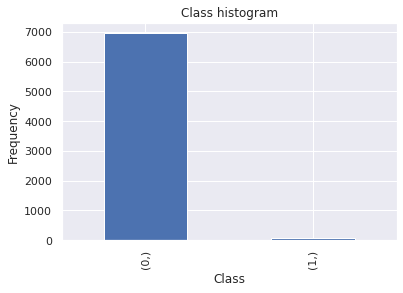

In [ ]:
df_trainy.value_counts().plot.bar()
plt.title('Class histogram')
plt.xlabel('Class')
plt.ylabel('Frequency')
df_trainy.value_counts()

Data Imbalanced observed

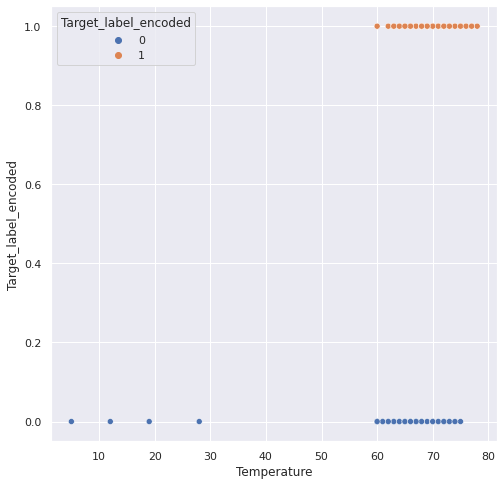

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = data_with_dummies, x='Temperature', y='Target_label_encoded',hue = 'Target_label_encoded')

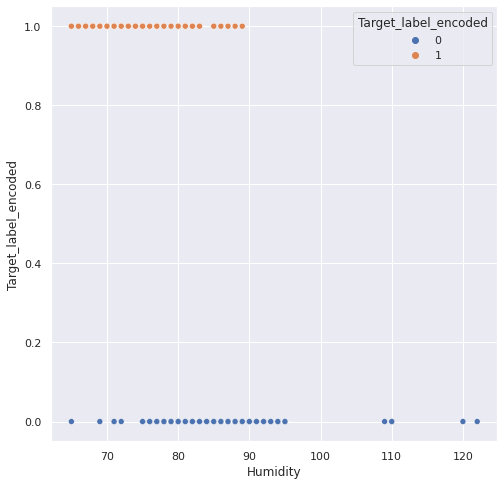

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = data_with_dummies, x='Humidity', y='Target_label_encoded',hue = 'Target_label_encoded')

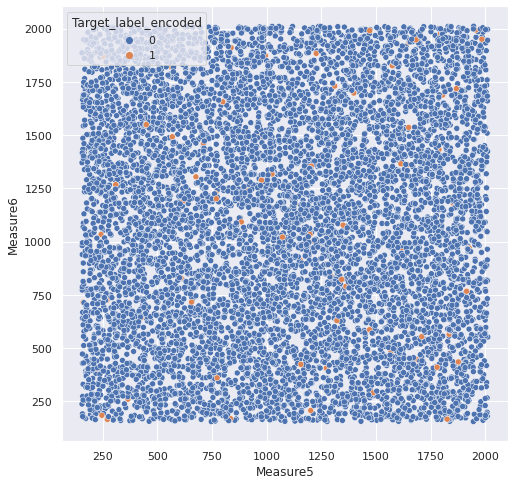

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = data_with_dummies, x='Measure5', y='Measure6',hue = 'Target_label_encoded')

#### 3.4 Feature Corelations                                          

In [ ]:
df_lr = data.copy()

Text(0.5, 1.0, 'Correlation between features')

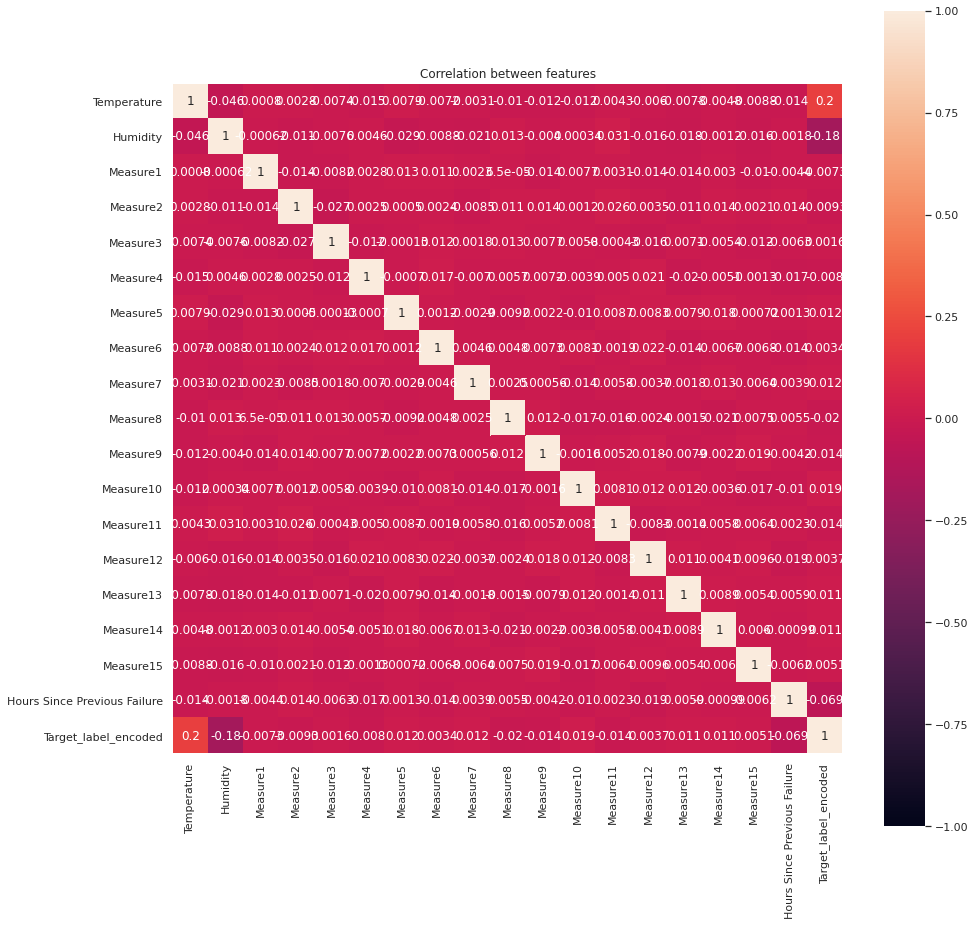

In [ ]:
corr = df_lr.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, square = True,annot= True, vmin=-1, vmax=1) #  vmin=-1, vmax=1
plt.title('Correlation between features')

Features are not correlated among each others; 
Temperature and Humidity is mildly correlated with Target

### 4. Handling Imbalanced data

#### 4.1 Train & Test split                                          

In [ ]:
from sklearn.model_selection import train_test_split
X_trainlr, X_testlr, y_trainlr, y_testlr = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
print('Train cases as below')
print('X_train shape: ',X_trainlr.shape)
print('y_train shape: ',y_trainlr.shape)
print('\nTest cases as below')
print('X_test shape: ',X_testlr.shape)
print('y_test shape: ',y_testlr.shape)

Train cases as below
X_train shape:  (7027, 25)
y_train shape:  (7027,)

Test cases as below
X_test shape:  (1757, 25)
y_test shape:  (1757,)


0    6960
1    67  
Name: Target_label_encoded, dtype: int64

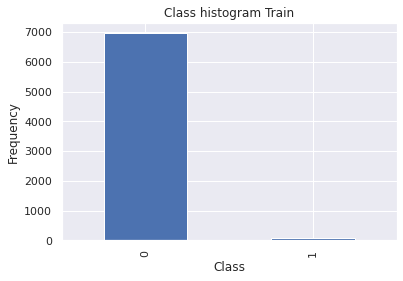

In [ ]:
pd.value_counts(y_trainlr).plot.bar()
plt.title('Class histogram Train')
plt.xlabel('Class')
plt.ylabel('Frequency')
y_trainlr.value_counts()

0    1743
1    14  
Name: Target_label_encoded, dtype: int64

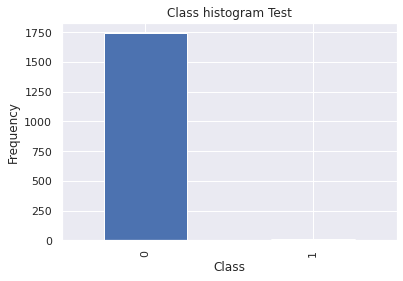

In [ ]:
pd.value_counts(y_testlr).plot.bar()
plt.title('Class histogram Test')
plt.xlabel('Class')
plt.ylabel('Frequency')
y_testlr.value_counts()

#### 4.2 SMOTE : Oversampling technique adopted on Train data                                          

In [ ]:
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
smt = SMOTE()
X_osmpl,y_osmpl=smt.fit_sample(X_trainlr, y_trainlr)
np.bincount(y_osmpl)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([6960, 6960])

1    6960
0    6960
dtype: int64

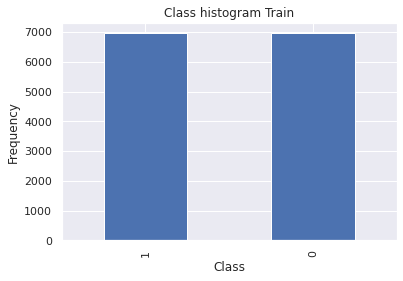

In [ ]:
pd.value_counts(y_osmpl).plot.bar()
plt.title('Class histogram Train')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(y_osmpl)

In [ ]:
df_Xosmpl = pd.DataFrame(data = X_osmpl, columns = col)
df_Xosmpl.head(3)

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Operator_Operator2,Operator_Operator3,Operator_Operator4,Operator_Operator5,Operator_Operator6,Operator_Operator7,Operator_Operator8
0,63,82,1189,1,2,1336,1335,1239,1375,586,191,682,1363,714,1271,1429,943,45,0,1,0,0,0,0,0
1,60,79,1948,1,0,913,344,626,253,1830,1737,1598,406,493,1082,1683,1182,337,0,0,0,0,0,0,0
2,67,78,364,1,0,594,240,585,1795,580,1578,719,447,171,1808,1686,753,465,0,0,0,0,0,0,1


In [ ]:
df_yosmpl=pd.DataFrame(data = y_osmpl)
df_yosmpl.columns=['Target_label_encoded']
df_yosmpl.head(3)

,Target_label_encoded
0,0
1,0
2,0


In [ ]:
df_train=df_Xosmpl.join(df_yosmpl, lsuffix="_left", rsuffix="_right")
df_train.head(3)

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Operator_Operator2,Operator_Operator3,Operator_Operator4,Operator_Operator5,Operator_Operator6,Operator_Operator7,Operator_Operator8,Target_label_encoded
0,63,82,1189,1,2,1336,1335,1239,1375,586,191,682,1363,714,1271,1429,943,45,0,1,0,0,0,0,0,0
1,60,79,1948,1,0,913,344,626,253,1830,1737,1598,406,493,1082,1683,1182,337,0,0,0,0,0,0,0,0
2,67,78,364,1,0,594,240,585,1795,580,1578,719,447,171,1808,1686,753,465,0,0,0,0,0,0,1,0


### 5. Neural Network

#### 5.1 Build Model                                          

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# define and fit the model
def get_model(trainX, trainy):
	# define model
	model = Sequential()
	model.add(Dense(100, input_dim=2, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit model
	model.fit(trainX, trainy, epochs=300, verbose=0)
	return model

In [ ]:
print('Train X size :', df_trainX.shape)
print('Train y size :', df_trainy.shape)
print('Test X size :', df_testX.shape)
print('Test y size :', df_testy.shape)

Train X size : (7027, 25)
Train y size : (7027, 1)
Test X size : (1757, 25)
Test y size : (1757, 1)


In [ ]:
model = Sequential()
model.add(Dense(100,input_dim=25,activation='relu'))
#model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


Train: 1.000, Test : 0.996


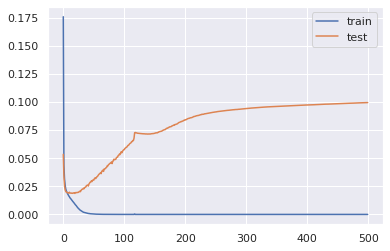

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(df_trainX,df_trainy,validation_data =(df_testX,df_testy),epochs=500,verbose=0)
_,train_acc=model.evaluate(df_trainX,df_trainy,verbose=0)
_,test_acc=model.evaluate(df_testX,df_testy,verbose=0)
print('Train: %.3f, Test : %.3f' %(train_acc,test_acc))
plt.plot(history.history['loss'],label ='train')
plt.plot(history.history['val_loss'],label ='test')
plt.legend()
plt.show()

In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(df_testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(df_testX, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df_testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(df_testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(df_testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df_testy, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(df_testy, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(df_testy, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(df_testy, yhat_classes)
print(matrix)

Accuracy: 0.996016
Precision: 0.846154
Recall: 0.687500
F1 score: 0.758621
Cohens kappa: 0.756634
ROC AUC: 0.919335
[[1739    2]
 [   5   11]]


In [ ]:
import keras
from keras import backend as K
import tensorflow as tf

# Define our custom loss function
def focal_loss(y_true, y_pred):
    gamma = 4.0
    alpha = 0.05
    pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
    pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
    return -K.sum(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1))-K.sum((1-alpha) * K.pow( pt_0, gamma) * K.log(1. - pt_0))

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim=25,activation='relu'))
#model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               2600      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile our model
#adam = keras.optimizers.Adam(lr=0.0001)
model.compile(loss=[focal_loss], metrics=["accuracy"], optimizer='adam') 

Train: 1.000, Test : 0.997


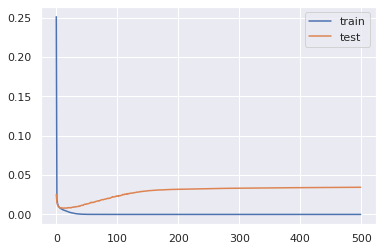

In [ ]:
history = model.fit(df_trainX,df_trainy,validation_data =(df_testX,df_testy),epochs=500,verbose=0)
_,train_acc=model.evaluate(df_trainX,df_trainy,verbose=0)
_,test_acc=model.evaluate(df_testX,df_testy,verbose=0)
print('Train: %.3f, Test : %.3f' %(train_acc,test_acc))
plt.plot(history.history['loss'],label ='train')
plt.plot(history.history['val_loss'],label ='test')
plt.legend()
plt.show()

In [ ]:
# predict probabilities for test set
yhat_probs = model.predict(df_testX, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(df_testX, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df_testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(df_testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(df_testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df_testy, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(df_testy, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(df_testy, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(df_testy, yhat_classes)
print(matrix)

Accuracy: 0.997154
Precision: 0.923077
Recall: 0.750000
F1 score: 0.827586
Cohens kappa: 0.826167
ROC AUC: 0.922028
[[1740    1]
 [   4   12]]


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import models

In [ ]:
es = EarlyStopping(monitor='val_loss', mode = 'min',verbose=1,patience = 200)
#mc = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5',monitor='val_accuracy', mode = 'max',verbose=1,save_best_only=True)
mc = ModelCheckpoint('best_model_bc_l1.h5',monitor='val_loss', mode = 'min',verbose=0,save_best_only=True)

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim=25,activation='relu',activity_regularizer='l1'))
#model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 100)               2600      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile our model
#adam = keras.optimizers.Adam(lr=0.0001)
model.compile(loss='binary_crossentropy', metrics=["accuracy"], optimizer='adam') 

Epoch 00480: early stopping
Train: 0.999, Test : 0.998


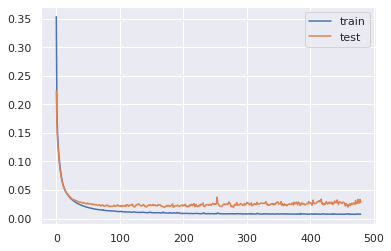

In [ ]:
history = model.fit(df_trainX,df_trainy,validation_data =(df_testX,df_testy),epochs=1000,verbose=0,callbacks=[es,mc])
saved_model = models.load_model('best_model_bc_l1.h5')  #custom_objects={'focal_loss': focal_loss(df_trainX,df_trainy)}
#saved_model = model
_,train_acc=saved_model.evaluate(df_trainX,df_trainy,verbose=0)
_,test_acc=saved_model.evaluate(df_testX,df_testy,verbose=0)
print('Train: %.3f, Test : %.3f' %(train_acc,test_acc))
plt.plot(history.history['loss'],label ='train')
plt.plot(history.history['val_loss'],label ='test')
plt.legend()
plt.show()

In [ ]:
# predict probabilities for test set
yhat_probs = saved_model.predict(df_testX, verbose=0)
# predict crisp classes for test set
yhat_classes = saved_model.predict_classes(df_testX, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df_testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(df_testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(df_testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df_testy, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(df_testy, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(df_testy, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(df_testy, yhat_classes)
print(matrix)

Accuracy: 0.997723
Precision: 1.000000
Recall: 0.750000
F1 score: 0.857143
Cohens kappa: 0.856019
ROC AUC: 0.921417
[[1741    0]
 [   4   12]]


In [ ]:
es = EarlyStopping(monitor='val_loss', mode = 'min',verbose=1,patience = 10)
#mc = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5',monitor='val_accuracy', mode = 'max',verbose=1,save_best_only=True)
mc1 = ModelCheckpoint('best_model_fl_l1.h5',monitor='val_accuracy', mode = 'max',verbose=0,save_best_only=True)

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim=25,activation='relu',activity_regularizer='l1'))
#model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 100)               2600      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile our model
#adam = keras.optimizers.Adam(lr=0.0001)
model.compile(loss=[focal_loss], metrics=["accuracy"], optimizer='adam') 

Epoch 00064: early stopping
Train: 0.996, Test : 0.998


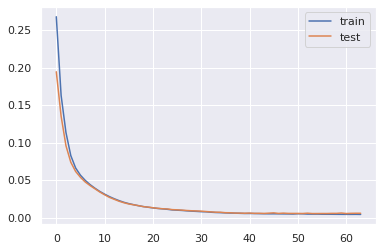

In [ ]:
history = model.fit(df_trainX,df_trainy,validation_data =(df_testX,df_testy),epochs=1000,verbose=0,callbacks=[es, mc1])
saved_model = models.load_model('best_model_fl_l1.h5',custom_objects={'focal_loss': focal_loss}, compile= True)  #custom_objects={'focal_loss': focal_loss}
#saved_model = model
#saved_model.compile(loss=[focal_loss], metrics=["accuracy"], optimizer='adam')
_,train_acc=saved_model.evaluate(df_trainX,df_trainy,verbose=0)
_,test_acc=saved_model.evaluate(df_testX,df_testy,verbose=0)
print('Train: %.3f, Test : %.3f' %(train_acc,test_acc))
plt.plot(history.history['loss'],label ='train')
plt.plot(history.history['val_loss'],label ='test')
plt.legend()
plt.show()

In [ ]:
# predict probabilities for test set
yhat_probs = saved_model.predict(df_testX, verbose=0)
# predict crisp classes for test set
yhat_classes = saved_model.predict_classes(df_testX, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df_testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(df_testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(df_testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df_testy, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(df_testy, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(df_testy, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(df_testy, yhat_classes)
print(matrix)

Accuracy: 0.997723
Precision: 1.000000
Recall: 0.750000
F1 score: 0.857143
Cohens kappa: 0.856019
ROC AUC: 0.915925
[[1741    0]
 [   4   12]]


In [ ]:
smt = SMOTE()
df_osmplX,df_osmply=smt.fit_sample(df_trainX, df_trainy)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    6962
0    6962
dtype: int64

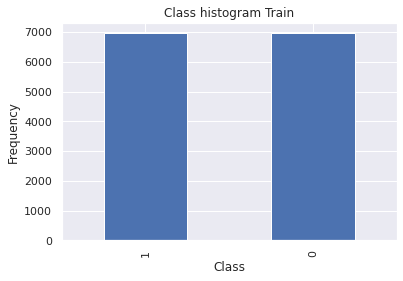

In [ ]:
pd.value_counts(df_osmply).plot.bar()
plt.title('Class histogram Train')
plt.xlabel('Class')
plt.ylabel('Frequency')
pd.value_counts(df_osmply)

In [ ]:
df_osmpl_X = pd.DataFrame(data = df_osmplX, columns = col)
df_osmpl_X.head(3)

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Operator_Operator2,Operator_Operator3,Operator_Operator4,Operator_Operator5,Operator_Operator6,Operator_Operator7,Operator_Operator8
0,-0.350941,0.335764,-0.153911,0.453078,1.215645,0.776733,-0.879174,0.873832,-0.599725,-0.870544,-0.168632,-1.476123,-0.642219,-1.004962,-0.113613,-0.746408,1.584827,0.812920,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.679447,1.971125,0.498026,-1.340601,1.215645,0.025265,1.145664,-0.746733,-0.447445,-1.399701,-0.277086,-0.393946,0.592432,-1.293086,-1.125600,1.267472,-1.537733,-0.562866,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.679447,-0.686336,1.162965,0.453078,1.215645,1.001801,0.586120,-1.437250,1.209068,-1.008423,0.594284,-0.631315,-0.528107,-1.543546,-0.585128,0.061009,-0.754295,1.049898,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_osmpl_y=pd.DataFrame(data = df_osmply)
df_osmpl_y.columns=['Target_label_encoded']
df_osmpl_y.head(3)

,Target_label_encoded
0,0
1,0
2,0


In [ ]:
print('Train cases as below')
print('X_train shape: ',df_osmpl_X.shape)
print('y_train shape: ',df_osmpl_y.shape)
print('\nTest cases as below')
print('X_test shape: ',df_testX.shape)
print('y_test shape: ',df_testy.shape)

Train cases as below
X_train shape:  (13924, 25)
y_train shape:  (13924, 1)

Test cases as below
X_test shape:  (1757, 25)
y_test shape:  (1757, 1)


In [ ]:
es = EarlyStopping(monitor='val_loss', mode = 'min',verbose=1,patience = 10)
#mc = ModelCheckpoint('weights.{epoch:02d}-{val_loss:.2f}.hdf5',monitor='val_accuracy', mode = 'max',verbose=1,save_best_only=True)
mc1 = ModelCheckpoint('best_model_fl_l2_os.h5',monitor='val_accuracy', mode = 'max',verbose=0,save_best_only=True)

In [ ]:
model = Sequential()
model.add(Dense(100,input_dim=25,activation='relu',activity_regularizer='l2'))
#model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 100)               2600      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 101       
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile our model
#adam = keras.optimizers.Adam(lr=0.0001)
model.compile(loss=[focal_loss], metrics=["accuracy"], optimizer='adam') 

Epoch 00049: early stopping
Train: 0.937, Test : 0.998


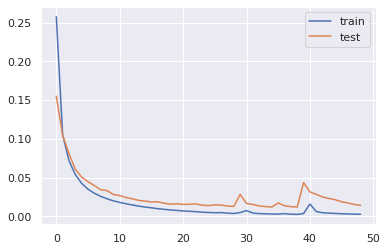

In [ ]:
history = model.fit(df_osmpl_X,df_osmpl_y,validation_data =(df_testX,df_testy),epochs=1000,verbose=0,callbacks=[es, mc1])
saved_model = models.load_model('best_model_fl_l2_os.h5',custom_objects={'focal_loss': focal_loss}, compile= True)  #custom_objects={'focal_loss': focal_loss}
#saved_model = model
#saved_model.compile(loss=[focal_loss], metrics=["accuracy"], optimizer='adam')
_,train_acc=saved_model.evaluate(df_osmpl_X,df_osmpl_y,verbose=0)
_,test_acc=saved_model.evaluate(df_testX,df_testy,verbose=0)
print('Train: %.3f, Test : %.3f' %(train_acc,test_acc))
plt.plot(history.history['loss'],label ='train')
plt.plot(history.history['val_loss'],label ='test')
plt.legend()
plt.show()

In [ ]:
# predict probabilities for test set
yhat_probs = saved_model.predict(df_testX, verbose=0)
# predict crisp classes for test set
yhat_classes = saved_model.predict_classes(df_testX, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]
 
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(df_testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(df_testy, yhat_classes)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(df_testy, yhat_classes)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(df_testy, yhat_classes)
print('F1 score: %f' % f1)
 
# kappa
kappa = cohen_kappa_score(df_testy, yhat_classes)
print('Cohens kappa: %f' % kappa)
# ROC AUC
auc = roc_auc_score(df_testy, yhat_probs)
print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(df_testy, yhat_classes)
print(matrix)

Accuracy: 0.997723
Precision: 1.000000
Recall: 0.750000
F1 score: 0.857143
Cohens kappa: 0.856019
ROC AUC: 0.924433
[[1741    0]
 [   4   12]]


In [ ]:
nn_bc_l1 = models.load_model('best_model_bc_l1.h5', compile= True)
nn_fl_l1 = models.load_model('best_model_fl_l1.h5',custom_objects={'focal_loss': focal_loss}, compile= True)
nn_fl_l2_os = models.load_model('best_model_fl_l2_os.h5',custom_objects={'focal_loss': focal_loss}, compile= True)

### 6. Logistic Regression

#### 6.1 Build Model                                          

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(df_Xosmpl,df_yosmpl.values.reshape(-1,))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_train = logreg.predict(df_Xosmpl)

In [ ]:
y_pred_train

array([0, 0, 0, ..., 1, 1, 1])

#### 6.2 Prediction using Model                                          

In [ ]:
y_pred_test = logreg.predict(X_testlr)

In [ ]:
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test_predictions = X_testlr.copy()

In [ ]:
test_predictions['actual'] = y_testlr
test_predictions['predicted'] = y_pred_test
test_predictions

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Operator_Operator2,Operator_Operator3,Operator_Operator4,Operator_Operator5,Operator_Operator6,Operator_Operator7,Operator_Operator8,actual,predicted
6279,67,82,1744,3,2,644,1599,1514,1957,1169,303,1468,1255,942,835,1308,815,262,0,1,0,0,0,0,0,0,0
1005,68,81,875,3,0,1964,1572,1325,220,1317,1119,946,2000,1290,1975,368,1812,338,0,0,0,0,0,0,1,0,0
8651,67,83,162,3,2,1302,438,691,1262,1448,1219,1025,1320,1652,571,1540,1272,58,0,1,0,0,0,0,0,0,0
5408,64,89,857,1,2,525,1789,1689,1903,1603,391,882,1609,1282,1930,217,381,290,0,1,0,0,0,0,0,0,0
7136,64,83,815,3,0,875,1287,1969,398,1067,1123,778,1036,1827,1209,1862,599,246,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,68,82,1047,3,0,1389,1242,1388,1762,1807,1386,1130,1564,1397,555,970,411,532,0,0,1,0,0,0,0,0,0
8524,61,77,587,3,2,1141,345,649,369,1179,1607,1160,1053,1723,1149,852,1308,342,1,0,0,0,0,0,0,0,0
2379,60,85,1568,2,1,555,1456,1572,1671,754,1837,475,370,738,1545,1727,1857,547,0,0,0,0,0,0,0,0,0
5997,67,82,1079,2,2,1380,1433,1248,1010,470,1611,1013,1845,1110,1612,1582,515,9,0,0,0,1,0,0,0,0,0


#### 6.3 Model Evaluation                                          

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_testlr,y_pred_test))
print('Accuracy score for train data is:', accuracy_score(y_osmpl,y_pred_train))

Accuracy score for test data is: 0.9368241320432555
Accuracy score for train data is: 0.9042385057471264


In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_testlr, y_pred_test)
print(conf_matrix)


[[1636  107]
 [   4   10]]


In [ ]:
from sklearn.metrics import recall_score
def log():
    recall1 = recall_score(y_testlr, y_pred_test)
    print('Recall score for test data is:', recall1)
    return recall1
recall1 = log()

Recall score for test data is: 0.7142857142857143


In [ ]:
from sklearn.metrics import recall_score
def log():
    recall1 = recall_score(y_osmpl,y_pred_train)
    print('Recall score for train data is:', recall1)
    return recall1
recall1 = log()

Recall score for train data is: 0.8827586206896552


In [ ]:
from sklearn.metrics import classification_report
def lr():
    print(classification_report(y_testlr, y_pred_test))
lr()

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1743
           1       0.09      0.71      0.15        14

    accuracy                           0.94      1757
   macro avg       0.54      0.83      0.56      1757
weighted avg       0.99      0.94      0.96      1757



In [ ]:
from sklearn.metrics import classification_report
def lr():
    print(classification_report(y_osmpl,y_pred_train))
lr()

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      6960
           1       0.92      0.88      0.90      6960

    accuracy                           0.90     13920
   macro avg       0.90      0.90      0.90     13920
weighted avg       0.90      0.90      0.90     13920



In [ ]:
c_matrix = pd.DataFrame(confusion_matrix(y_testlr, y_pred_test))

print(c_matrix)

      0    1
0  1636  107
1  4     10 


In [ ]:
c_matrix.index = ['Actual not Failed','Actual Failed']
c_matrix.columns = ['Predicted not Failed','Predicted Failed']
print(c_matrix)

                   Predicted not Failed  Predicted Failed
Actual not Failed  1636                  107             
Actual Failed      4                     10              


In [ ]:
logreg.coef_ 

array([[ 3.63354132e-01, -3.05715517e-01,  9.31093918e-05,
        -6.33712384e-02, -1.87916982e-02, -2.15452334e-04,
        -2.25360287e-04,  8.18385634e-05,  2.48884372e-04,
         6.50272378e-04, -1.04948516e-03,  3.59063383e-04,
         2.19693689e-04, -2.93659427e-05,  2.14195689e-04,
         1.98637751e-04,  9.90476896e-05, -5.98462443e-03,
        -1.81174858e-02, -9.96060304e-03, -9.62292463e-03,
        -9.32496035e-03, -9.21707145e-03, -7.89555818e-03,
        -1.00221596e-02]])

In [ ]:
len(logreg.coef_[0])

25

In [ ]:
len(df_Xosmpl.columns)

25

In [ ]:
df_Xosmpl.columns

Index(['Temperature', 'Humidity', 'Measure1', 'Measure2', 'Measure3',
       'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8', 'Measure9',
       'Measure10', 'Measure11', 'Measure12', 'Measure13', 'Measure14',
       'Measure15', 'Hours Since Previous Failure', 'Operator_Operator2',
       'Operator_Operator3', 'Operator_Operator4', 'Operator_Operator5',
       'Operator_Operator6', 'Operator_Operator7', 'Operator_Operator8'],
      dtype='object')

In [ ]:
test_predictions['intercept'] = logreg.intercept_[0]

In [ ]:
for i in range(0,len(logreg.coef_[0])):
    test_predictions[df_Xosmpl.columns[i] + "_coef"] = logreg.coef_[0][i]

In [ ]:
test_predictions

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Operator_Operator2,Operator_Operator3,Operator_Operator4,Operator_Operator5,Operator_Operator6,Operator_Operator7,Operator_Operator8,...,Temperature_coef,Humidity_coef,Measure1_coef,Measure2_coef,Measure3_coef,Measure4_coef,Measure5_coef,Measure6_coef,Measure7_coef,Measure8_coef,Measure9_coef,Measure10_coef,Measure11_coef,Measure12_coef,Measure13_coef,Measure14_coef,Measure15_coef,Hours Since Previous Failure_coef,Operator_Operator2_coef,Operator_Operator3_coef,Operator_Operator4_coef,Operator_Operator5_coef,Operator_Operator6_coef,Operator_Operator7_coef,Operator_Operator8_coef
6279,67,82,1744,3,2,644,1599,1514,1957,1169,303,1468,1255,942,835,1308,815,262,0,1,0,0,0,0,0,...,0.363354,-0.305716,0.000093,-0.063371,-0.018792,-0.000215,-0.000225,0.000082,0.000249,0.00065,-0.001049,0.000359,0.00022,-0.000029,0.000214,0.000199,0.000099,-0.005985,-0.018117,-0.009961,-0.009623,-0.009325,-0.009217,-0.007896,-0.010022
1005,68,81,875,3,0,1964,1572,1325,220,1317,1119,946,2000,1290,1975,368,1812,338,0,0,0,0,0,0,1,...,0.363354,-0.305716,0.000093,-0.063371,-0.018792,-0.000215,-0.000225,0.000082,0.000249,0.00065,-0.001049,0.000359,0.00022,-0.000029,0.000214,0.000199,0.000099,-0.005985,-0.018117,-0.009961,-0.009623,-0.009325,-0.009217,-0.007896,-0.010022
8651,67,83,162,3,2,1302,438,691,1262,1448,1219,1025,1320,1652,571,1540,1272,58,0,1,0,0,0,0,0,...,0.363354,-0.305716,0.000093,-0.063371,-0.018792,-0.000215,-0.000225,0.000082,0.000249,0.00065,-0.001049,0.000359,0.00022,-0.000029,0.000214,0.000199,0.000099,-0.005985,-0.018117,-0.009961,-0.009623,-0.009325,-0.009217,-0.007896,-0.010022
5408,64,89,857,1,2,525,1789,1689,1903,1603,391,882,1609,1282,1930,217,381,290,0,1,0,0,0,0,0,...,0.363354,-0.305716,0.000093,-0.063371,-0.018792,-0.000215,-0.000225,0.000082,0.000249,0.00065,-0.001049,0.000359,0.00022,-0.000029,0.000214,0.000199,0.000099,-0.005985,-0.018117,-0.009961,-0.009623,-0.009325,-0.009217,-0.007896,-0.010022
7136,64,83,815,3,0,875,1287,1969,398,1067,1123,778,1036,1827,1209,1862,599,246,0,1,0,0,0,0,0,...,0.363354,-0.305716,0.000093,-0.063371,-0.018792,-0.000215,-0.000225,0.000082,0.000249,0.00065,-0.001049,0.000359,0.00022,-0.000029,0.000214,0.000199,0.000099,-0.005985,-0.018117,-0.009961,-0.009623,-0.009325,-0.009217,-0.007896,-0.010022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,68,82,1047,3,0,1389,1242,1388,1762,1807,1386,1130,1564,1397,555,970,411,532,0,0,1,0,0,0,0,...,0.363354,-0.305716,0.000093,-0.063371,-0.018792,-0.000215,-0.000225,0.000082,0.000249,0.00065,-0.001049,0.000359,0.00022,-0.000029,0.000214,0.000199,0.000099,-0.005985,-0.018117,-0.009961,-0.009623,-0.009325,-0.009217,-0.007896,-0.010022
8524,61,77,587,3,2,1141,345,649,369,1179,1607,1160,1053,1723,1149,852,1308,342,1,0,0,0,0,0,0,...,0.363354,-0.305716,0.000093,-0.063371,-0.018792,-0.000215,-0.000225,0.000082,0.000249,0.00065,-0.001049,0.000359,0.00022,-0.000029,0.000214,0.000199,0.000099,-0.005985,-0.018117,-0.009961,-0.009623,-0.009325,-0.009217,-0.007896,-0.010022
2379,60,85,1568,2,1,555,1456,1572,1671,754,1837,475,370,738,1545,1727,1857,547,0,0,0,0,0,0,0,...,0.363354,-0.305716,0.000093,-0.063371,-0.018792,-0.000215,-0.000225,0.000082,0.000249,0.00065,-0.001049,0.000359,0.00022,-0.000029,0.000214,0.000199,0.000099,-0.005985,-0.018117,-0.009961,-0.009623,-0.009325,-0.009217,-0.007896,-0.010022
5997,67,82,1079,2,2,1380,1433,1248,1010,470,1611,1013,1845,1110,1612,1582,515,9,0,0,0,1,0,0,0,...,0.363354,-0.305716,0.000093,-0.063371,-0.018792,-0.000215,-0.000225,0.000082,0.000249,0.00065,-0.001049,0.000359,0.00022,-0.000029,0.000214,0.000199,0.000099,-0.005985,-0.018117,-0.009961,-0.009623,-0.009325,-0.009217,-0.007896,-0.010

### 7. Decision Tree : Gini

#### 7.1 Build Model                                          

In [ ]:
from sklearn.tree import DecisionTreeClassifier
def tree():
    dtree = DecisionTreeClassifier()
    return dtree
dtree = tree()

In [ ]:
def tree():
    return dtree.fit(df_Xosmpl,df_yosmpl.values.reshape(-1,))
tree()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 7.2 Prediction using Model                                          

In [ ]:
predictions = pd.DataFrame()
def tree():
    predictions = dtree.predict(X_testlr)
    return predictions
predictions = tree()

#### 7.3 Model Evaluation                                          

In [ ]:
from sklearn.metrics import confusion_matrix
def tree():
    print(confusion_matrix(y_testlr, predictions))
tree()

[[1713   30]
 [   4   10]]


In [ ]:
from sklearn.metrics import recall_score
def log():
    recall1 = recall_score(y_testlr, predictions)
    print('Recall score for test data is:', recall1)
    return recall1
recall1 = log()

Recall score for test data is: 0.7142857142857143


In [ ]:
from sklearn.metrics import classification_report
def tree():
    print(classification_report(y_testlr, predictions))
tree()

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1743
           1       0.25      0.71      0.37        14

    accuracy                           0.98      1757
   macro avg       0.62      0.85      0.68      1757
weighted avg       0.99      0.98      0.99      1757



### 8. Decision Tree : Entropy

#### 8.1 Build Model                                          

In [ ]:
def tree():
    dtree1 = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4)
    return dtree1
dtree1 = tree()

In [ ]:
def tree():
    return dtree1.fit(df_Xosmpl,df_yosmpl.values.reshape(-1,))
tree()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 8.2 Prediction using Model                                          

In [ ]:
predictions_new = pd.DataFrame()
def tree():
    predictions_new = dtree1.predict(X_testlr)
    return predictions_new
predictions_new = tree()

#### 8.3 Model Evaluation                                          

In [ ]:
from sklearn.metrics import confusion_matrix
def tree():
    print(confusion_matrix(y_testlr, predictions_new))
tree()

[[1737    6]
 [   4   10]]


In [ ]:
from sklearn.metrics import recall_score
def log():
    recall2 = recall_score(y_testlr, predictions_new)
    print('Recall score for test data is:', recall2)
    return recall2
recall2 = log()

Recall score for test data is: 0.7142857142857143


In [ ]:
from sklearn.metrics import classification_report
def tree():
    print(classification_report(y_testlr, predictions_new))
tree()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       0.62      0.71      0.67        14

    accuracy                           0.99      1757
   macro avg       0.81      0.86      0.83      1757
weighted avg       0.99      0.99      0.99      1757



In [ ]:
def log():
    difference = recall1 - recall2
    return difference
log()

0.0

### 9. Random Forest : Gini

#### 9.1 Build Model                                          

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def rf():
    rfc = RandomForestClassifier(n_estimators=600)
    return rfc
rfc = rf()

In [ ]:
def rf():
    return rfc.fit(df_Xosmpl,df_yosmpl.values.reshape(-1,))
rf()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### 9.2 Prediction using Model                                          

In [ ]:
predictions1 = pd.DataFrame()
def rf():
    predictions1 = rfc.predict(X_testlr)
    return predictions1
predictions1 = rf()

#### 9.3 Model Evaluation                                          

In [ ]:
def rf():
    print(confusion_matrix(y_testlr,predictions1))
rf()

[[1741    2]
 [   4   10]]


In [ ]:
from sklearn.metrics import recall_score
def log():
    recall_rfc = recall_score(y_testlr,predictions1)
    print('Recall score for test data is:', recall_rfc)
    return recall_rfc
recall_rfc = log()

Recall score for test data is: 0.7142857142857143


In [ ]:
def rf():
    print(classification_report(y_testlr,predictions1))
rf()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       0.83      0.71      0.77        14

    accuracy                           1.00      1757
   macro avg       0.92      0.86      0.88      1757
weighted avg       1.00      1.00      1.00      1757



### 10. Random Forest : Entropy

#### 10.1 Build Model                                          

In [ ]:
def rf():
    rfc_new = RandomForestClassifier(criterion='entropy',n_estimators = 100, random_state = 0, max_depth = 2, min_samples_split=4, min_samples_leaf=3, max_leaf_nodes=5)
    return rfc_new
rfc_new = rf()

In [ ]:
def rf():
    return rfc_new.fit(df_Xosmpl,df_yosmpl)
rf()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=2, max_features='auto',
                       max_leaf_nodes=5, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

#### 10.2 Prediction using Model                                          

In [ ]:
new_predictions = pd.DataFrame()
def rf():
    new_predictions = rfc_new.predict(X_testlr)
    return new_predictions
new_predictions = rf()

#### 10.3 Model Evaluation                                          

In [ ]:
def rf():
    print(confusion_matrix(y_testlr,new_predictions))
rf()

[[1740    3]
 [   4   10]]


In [ ]:
from sklearn.metrics import recall_score
def log():
    recall_rfc1 = recall_score(y_testlr,new_predictions)
    print('Recall score for test data is:', recall_rfc1)
    return recall_rfc1
recall_rfc1 = log()

Recall score for test data is: 0.7142857142857143


In [ ]:
def rf():
    print(classification_report(y_testlr,new_predictions))
rf()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       0.77      0.71      0.74        14

    accuracy                           1.00      1757
   macro avg       0.88      0.86      0.87      1757
weighted avg       1.00      1.00      1.00      1757



In [ ]:
def log():
    difference_rfc = recall_rfc - recall_rfc1
    return difference_rfc
log()

0.0

In [ ]:
rfc_new.feature_importances_

array([1.70413323e-01, 3.67895289e-01, 1.03919501e-03, 2.83924453e-02,
       7.75739723e-02, 1.54300190e-03, 4.39331095e-03, 9.75915033e-04,
       4.51977860e-03, 3.58658824e-04, 6.58306906e-04, 5.41726254e-04,
       6.68156856e-06, 6.45341316e-03, 2.21411516e-03, 5.30980781e-03,
       1.37152920e-03, 1.91353206e-01, 1.21843384e-02, 3.36849829e-02,
       3.90603283e-03, 2.40839861e-02, 1.86937492e-02, 0.00000000e+00,
       4.24332341e-02])

In [ ]:
#!pip install graphviz

In [ ]:
'''
from sklearn import tree
import graphviz
# DOT data
dot_data = tree.export_graphviz(dtree1,out_file=None,feature_names=col, class_names= 'Target_label_encoded', filled = True) 
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph
'''

'\nfrom sklearn import tree\nimport graphviz\n# DOT data\ndot_data = tree.export_graphviz(dtree1,out_file=None,feature_names=col, class_names= \'Target_label_encoded\', filled = True) \n# Draw graph\ngraph = graphviz.Source(dot_data, format="png") \ngraph\n'

In [ ]:
'''
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(dtree,out_file=None,feature_names=col, class_names= 'Target_label_encoded', filled = True) 
# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph
'''

'\nfrom sklearn import tree\n# DOT data\ndot_data = tree.export_graphviz(dtree,out_file=None,feature_names=col, class_names= \'Target_label_encoded\', filled = True) \n# Draw graph\ngraph = graphviz.Source(dot_data, format="png") \ngraph\n'

### 11. Decision Tree with Class weight and Entropy



#### 11.1 Build Model                                          

In [ ]:
def tree():
    dtree2 = DecisionTreeClassifier(class_weight={1:700},criterion = 'entropy', max_leaf_nodes=10, max_depth=3, min_samples_split=5, min_samples_leaf=4)
    return dtree1
dtree2 = tree()

In [ ]:
def tree():
    return dtree2.fit(df_Xosmpl,df_yosmpl.values.reshape(-1,))
tree()

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 11.2 Prediction using Model                                          

In [ ]:
predictions_new1 = pd.DataFrame()
def tree():
    predictions_new1 = dtree2.predict(X_testlr)
    return predictions_new1
predictions_new1 = tree()

#### 11.3 Model Evaluation                                          

In [ ]:
predictions_new1=pd.DataFrame(predictions_new1,columns=['outcome'])
predictions_new1.head(3)

,outcome
0,0
1,0
2,0


In [ ]:
a = pd.DataFrame(dtree2.predict_proba(X_testlr)[:,1],columns=['proba'])
a

,proba
0,0.117082
1,0.117082
2,0.117082
3,0.117082
4,0.117082
...,...
1752,0.117082
1753,0.117082
1754,0.117082
1755,0.117082


In [ ]:
predictions_new1=predictions_new1.join(a, lsuffix="_left", rsuffix="_right")
predictions_new1.head(3)

,outcome,proba
0,0,0.117082
1,0,0.117082
2,0,0.117082


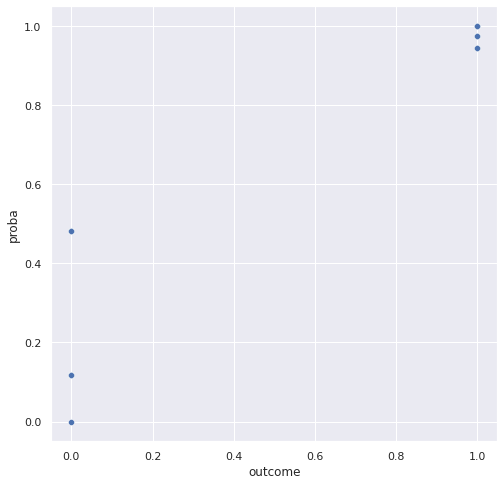

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(data = predictions_new1, x='outcome', y='proba')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


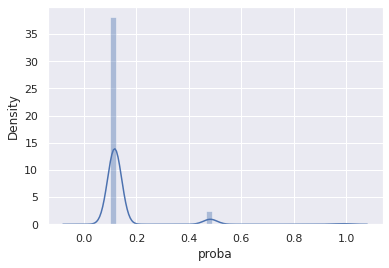

In [ ]:
sns.distplot(predictions_new1['proba'])

In [ ]:
predictions_new1.groupby(['outcome'])['outcome'].count()

outcome
0    1741
1    16  
Name: outcome, dtype: int64

In [ ]:
predictions_new1[predictions_new1['proba']>0.15].count()

outcome    124
proba      124
dtype: int64

In [ ]:
threshold = 0.1385 # You can play on this value (default is 0.5)
predictions_new1["pred"] = predictions_new1["proba"].apply(lambda el: 1.0 if el >= threshold else 0.0)

In [ ]:
from sklearn.metrics import confusion_matrix
def tree():
    print(confusion_matrix(y_testlr, predictions_new1["pred"]))
tree()

[[1629  114]
 [   4   10]]


In [ ]:
from sklearn.metrics import recall_score
def log():
    recall3 = recall_score(y_testlr, predictions_new1["pred"])
    print('Recall score for test data is:', recall2)
    return recall3
recall3 = log()

Recall score for test data is: 0.7142857142857143


In [ ]:
from sklearn.metrics import classification_report
def tree():
    print(classification_report(y_testlr, predictions_new1["pred"]))
tree()

              precision    recall  f1-score   support

           0       1.00      0.93      0.97      1743
           1       0.08      0.71      0.14        14

    accuracy                           0.93      1757
   macro avg       0.54      0.82      0.55      1757
weighted avg       0.99      0.93      0.96      1757



### 12. RandomSearchCV on RF

#### 12.1 Build Model                                          

In [ ]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
#model
rf_classifier = RandomForestClassifier() 
#Implemente RandomSearchCV
m_params = { 
            "RF": {
                    "n_estimators" : np.linspace(2, 500, 500, dtype = "int"),  
                    "max_depth": [5, 20, 30, None], 
                    "min_samples_split": np.linspace(2, 50, 50, dtype = "int"),  
                    "max_features": ["sqrt", "log2",10, 20, None],
                    "oob_score": [True],
                    "bootstrap": [True]
                    },
            }
scoreFunction = {"recall": "recall", "precision": "precision"}
random_search = RandomizedSearchCV(rf_classifier,
                                       param_distributions = m_params["RF"], 
                                       n_iter = 20,
                                       scoring = scoreFunction,               
                                       refit = "recall",
                                       return_train_score = True,
                                       random_state = 42,
                                       cv = 5,
                                      verbose = 2 ) 
#trains and optimizes the model
random_search.fit(df_Xosmpl,df_yosmpl.values.reshape(-1,))
'''
 

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import RandomizedSearchCV\n#model\nrf_classifier = RandomForestClassifier() \n#Implemente RandomSearchCV\nm_params = { \n            "RF": {\n                    "n_estimators" : np.linspace(2, 500, 500, dtype = "int"),  \n                    "max_depth": [5, 20, 30, None], \n                    "min_samples_split": np.linspace(2, 50, 50, dtype = "int"),  \n                    "max_features": ["sqrt", "log2",10, 20, None],\n                    "oob_score": [True],\n                    "bootstrap": [True]\n                    },\n            }\nscoreFunction = {"recall": "recall", "precision": "precision"}\nrandom_search = RandomizedSearchCV(rf_classifier,\n                                       param_distributions = m_params["RF"], \n                                       n_iter = 20,\n                                       scoring = scoreFunction,               \n                                      

In [ ]:
'''
#recover the best model
model_rf_tuned = random_search.best_estimator_
model_rf_tuned
'''

'\n#recover the best model\nmodel_rf_tuned = random_search.best_estimator_\nmodel_rf_tuned\n'

In [ ]:
model_rf_tuned = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=168,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model_rf_tuned.fit(df_Xosmpl,df_yosmpl.values.reshape(-1,))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=168,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

#### 12.2 Prediction using Model                                          

In [ ]:
y_pred_test1 = model_rf_tuned.predict(X_testlr)
y_pred_train1 = model_rf_tuned.predict(df_Xosmpl)

#### 12.3 Model Evaluation                                          

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(df_yosmpl,y_pred_train1))
print('Accuracy score for test data is:', accuracy_score(y_testlr,y_pred_test1))

Accuracy score for train data is: 1.0
Accuracy score for test data is: 0.9960159362549801


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_testlr, y_pred_test1))

confusion_matrix.index = ['Actual not failed','Actual Failed']
confusion_matrix.columns = ['Predicted not failed','Predicted Failed']
print(confusion_matrix)

                   Predicted not failed  Predicted Failed
Actual not failed  1741                  2               
Actual Failed      5                     9               


In [ ]:
def dt_new():
    print(classification_report(y_testlr,y_pred_test1))
dt_new()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1743
           1       0.82      0.64      0.72        14

    accuracy                           1.00      1757
   macro avg       0.91      0.82      0.86      1757
weighted avg       1.00      1.00      1.00      1757



In [ ]:
from sklearn.metrics import precision_score
def pre():
    precision1 = precision_score(y_testlr,y_pred_test1)
    print('Precision score for test data is:', precision1)
    return precision1
precision1 = pre()

Precision score for test data is: 0.8181818181818182


In [ ]:
from sklearn.metrics import recall_score
def pre():
    print('Recall score for test data is:',recall_score(y_testlr,y_pred_test1))
pre()

Recall score for test data is: 0.6428571428571429


In [ ]:
from sklearn.metrics import f1_score
def pre():
    print('F1_score for test data is:',f1_score(y_testlr,y_pred_test1))
pre()

F1_score for test data is: 0.7200000000000001


In [ ]:
from sklearn import metrics
def pre():
    probs = model_rf_tuned.predict_proba(X_testlr)
    pred = probs[:,1]
    fpr1, tpr1, threshold = metrics.roc_curve(y_testlr,y_pred_test1)
    roc_auc1 = metrics.auc(fpr1, tpr1)
    return roc_auc1
pre()

0.8208548479632818

### 13. Model Evaluation among all the employed model

#### 13.1 Precision-Recall Curve and Classification Report                                          

In [ ]:
# predict probabilities
rfcnew_probs = model_rf_tuned.predict_proba(X_testlr)
lr_probs = logreg.predict_proba(X_testlr)
dt_probs = dtree.predict_proba(X_testlr)
dt1_probs = dtree1.predict_proba(X_testlr)
dt2_probs = dtree2.predict_proba(X_testlr)
rfc_probs = rfc.predict_proba(X_testlr)
rfc1_probs = rfc_new.predict_proba(X_testlr)
nn_bc_probs= nn_bc_l1.predict(df_testX)
nn_fl_l1_probs= nn_fl_l1.predict(df_testX)
nn_fl_l2_probs= nn_fl_l2_os.predict(df_testX)
# keep probabilities for the positive outcome only
rfcnew_probs = rfcnew_probs[:, 1]
lr_probs = lr_probs[:, 1]
dt_probs = dt_probs[:, 1]
dt1_probs = dt1_probs[:, 1]
dt2_probs = dt2_probs[:, 1]
rfc_probs = rfc_probs[:, 1]
rfc1_probs = rfc1_probs[:, 1]
nn_bc_probs= nn_bc_probs[:, 0]
nn_fl_l1_probs= nn_fl_l1_probs[:, 0]
nn_fl_l2_probs= nn_fl_l2_probs[:, 0]

In [ ]:
from sklearn.metrics import precision_recall_curve
# calculate precision and recall for each threshold
rfcnew_precision, rfcnew_recall, _ = precision_recall_curve(y_testlr, rfcnew_probs)
lr_precision, lr_recall, _ = precision_recall_curve(y_testlr, lr_probs)
dt_precision, dt_recall, _ = precision_recall_curve(y_testlr, dt_probs)
dt1_precision, dt1_recall, _ = precision_recall_curve(y_testlr, dt1_probs)
dt2_precision, dt2_recall, _ = precision_recall_curve(y_testlr, dt2_probs)
rfc_precision, rfc_recall, _ = precision_recall_curve(y_testlr, rfc_probs)
rfc1_precision, rfc1_recall, _ = precision_recall_curve(y_testlr, rfc1_probs)
nn_bc_l1_precision, nn_bc_l1_recall, _ = precision_recall_curve(df_testy, nn_bc_probs)
nn_fl_l1_precision, nn_fl_l1_recall, _ = precision_recall_curve(df_testy, nn_fl_l1_probs)
nn_fl_l2_os_precision, nn_fl_l2_os_recall, _ = precision_recall_curve(df_testy, nn_fl_l2_probs)

In [ ]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import auc
# calculate scores
lr_f1, lr_auc = fbeta_score(y_testlr, y_pred_test,average='weighted', beta=2), auc(lr_recall, lr_precision)
rfcnew_f1, rfcnew_auc = fbeta_score(y_testlr, y_pred_test1,average='weighted', beta=2), auc(rfcnew_recall, rfcnew_precision)
dt_f1, dt_auc = fbeta_score(y_testlr, predictions,average='weighted', beta=2), auc(dt_recall, dt_precision)
dt1_f1, dt1_auc = fbeta_score(y_testlr, predictions_new,average='weighted', beta=2), auc(dt1_recall, dt1_precision)
dt2_f1, dt2_auc = fbeta_score(y_testlr, predictions_new1.outcome,average='weighted', beta=2), auc(dt1_recall, dt2_precision)
rfc_f1, rfc_auc = fbeta_score(y_testlr, predictions1,average='weighted', beta=2), auc(rfc_recall, rfc_precision)
rfc1_f1, rfc1_auc = fbeta_score(y_testlr, new_predictions,average='weighted', beta=2), auc(rfc1_recall, rfc1_precision)
nn_bc_l1_f1,nn_bc_l1_auc = fbeta_score(df_testy, nn_bc_l1.predict_classes(df_testX, verbose=0),average='weighted', beta=2), auc(nn_bc_l1_recall,nn_bc_l1_precision)
nn_fl_l1_f1,nn_fl_l1_auc = fbeta_score(df_testy, nn_fl_l1.predict_classes(df_testX, verbose=0),average='weighted', beta=2), auc(nn_fl_l1_recall,nn_fl_l1_precision)
nn_fl_l2_f1,nn_fl_l2_auc = fbeta_score(df_testy, nn_fl_l2_os.predict_classes(df_testX, verbose=0),average='weighted', beta=2), auc(nn_fl_l2_os_recall,nn_fl_l2_os_precision)
# summarize scores
print('LR: f2=%.3f auc=%.3f' % (lr_f1, lr_auc))
print('RF Tuned: f2=%.3f auc=%.3f' % (rfcnew_f1, rfcnew_auc))
print('DT gini: f2=%.3f auc=%.3f' % (dt_f1, dt_auc))
print('DT entropy: f2=%.3f auc=%.3f' % (dt1_f1, dt1_auc))
print('DT_class_weighted_entropy: f2=%.3f auc=%.3f' % (dt2_f1, dt2_auc))
print('RF gini: f2=%.3f auc=%.3f' % (rfc_f1, rfc_auc))
print('RF entropy: f2=%.3f auc=%.3f' % (rfc1_f1, rfc1_auc))
print('NN BC entropy: f2=%.3f auc=%.3f' % (nn_bc_l1_f1, nn_bc_l1_auc))
print('NN FL L1 entropy: f2=%.3f auc=%.3f' % (nn_fl_l1_f1, nn_fl_l1_auc))
print('NN FL L2 entropy: f2=%.3f auc=%.3f' % (nn_fl_l2_f1, nn_fl_l2_auc))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses

LR: f2=0.945 auc=0.488
RF Tuned: f2=0.996 auc=0.695
DT gini: f2=0.982 auc=0.483
DT entropy: f2=0.994 auc=0.703
DT_class_weighted_entropy: f2=0.994 auc=0.703
RF gini: f2=0.997 auc=0.701
RF entropy: f2=0.996 auc=0.712
NN BC entropy: f2=0.998 auc=0.768
NN FL L1 entropy: f2=0.998 auc=0.805
NN FL L2 entropy: f2=0.998 auc=0.788


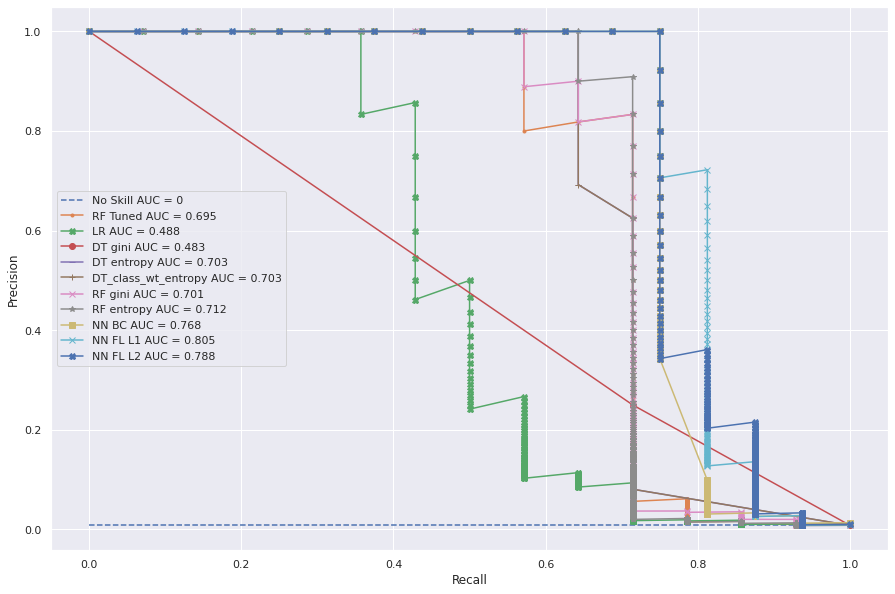

Class=1 fraction in test data is: 0.00796812749003984


In [ ]:
from matplotlib import pyplot
# plot the precision-recall curves
plt.figure(figsize=(15,10))
no_skill = len(y_testlr[y_testlr==1]) / len(y_testlr)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill AUC = 0')
pyplot.plot(rfcnew_recall, rfcnew_precision, marker='.', label='RF Tuned AUC = %0.3f' % rfcnew_auc)
pyplot.plot(lr_recall, lr_precision, marker='X', label='LR AUC = %0.3f' % lr_auc)
pyplot.plot(dt_recall, dt_precision, marker='o', label='DT gini AUC = %0.3f' % dt_auc)
pyplot.plot(dt1_recall, dt1_precision, marker='_', label='DT entropy AUC = %0.3f' % dt1_auc)
pyplot.plot(dt2_recall, dt2_precision, marker='+', label='DT_class_wt_entropy AUC = %0.3f' % dt2_auc)
pyplot.plot(rfc_recall, rfc_precision, marker='x', label='RF gini AUC = %0.3f' % rfc_auc)
pyplot.plot(rfc1_recall, rfc1_precision, marker='*', label='RF entropy AUC = %0.3f' % rfc1_auc)
pyplot.plot(nn_bc_l1_recall, nn_bc_l1_precision, marker='s', label='NN BC AUC = %0.3f' % nn_bc_l1_auc)
pyplot.plot(nn_fl_l1_recall, nn_fl_l1_precision, marker='x', label='NN FL L1 AUC = %0.3f' % nn_fl_l1_auc)
pyplot.plot(nn_fl_l2_os_recall, nn_fl_l2_os_precision, marker='X', label='NN FL L2 AUC = %0.3f' % nn_fl_l2_auc)
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()
print("Class=1 fraction in test data is:",no_skill)

#### 13.2 ROC-AUC Curve and compare against no skill model                                          

In [ ]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_testlr))]

In [ ]:
from sklearn.metrics import roc_auc_score
# calculate scores
ns_roc_auc = roc_auc_score(y_testlr, ns_probs)
rfcnew_roc_auc = roc_auc_score(y_testlr, rfcnew_probs)
lr_roc_auc = roc_auc_score(y_testlr, lr_probs)
dt_roc_auc = roc_auc_score(y_testlr, dt_probs)
dt1_roc_auc = roc_auc_score(y_testlr, dt1_probs)
dt2_roc_auc = roc_auc_score(y_testlr, dt2_probs)
rfc_roc_auc = roc_auc_score(y_testlr, rfc_probs)
rfc1_roc_auc = roc_auc_score(y_testlr, rfc1_probs)
nn_bc_l1_roc_auc = roc_auc_score(df_testy, nn_bc_probs)
nn_fl_l1_roc_auc = roc_auc_score(df_testy, nn_fl_l1_probs)
nn_fl_l2_roc_auc = roc_auc_score(df_testy, nn_fl_l2_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_roc_auc))
print('RF Tuned: ROC AUC=%.3f' % (rfcnew_roc_auc))
print('LR: ROC AUC=%.3f' % (lr_roc_auc))
print('DT gini: ROC AUC=%.3f' % (dt_roc_auc))
print('DT entropy: ROC AUC=%.3f' % (dt1_roc_auc))
print('DT_class_wt_entropy: ROC AUC=%.3f' % (dt2_roc_auc))
print('RF gini: ROC AUC=%.3f' % (rfc_roc_auc))
print('RF entropy: ROC AUC=%.3f' % (rfc1_roc_auc))
print('NN BC: ROC AUC=%.3f' % (nn_bc_l1_roc_auc))
print('NN FL L1: ROC AUC=%.3f' % (nn_fl_l1_roc_auc))
print('NN FL L2: ROC AUC=%.3f' % (nn_fl_l2_roc_auc))

No Skill: ROC AUC=0.500
RF Tuned: ROC AUC=0.863
LR: ROC AUC=0.840
DT gini: ROC AUC=0.849
DT entropy: ROC AUC=0.848
DT_class_wt_entropy: ROC AUC=0.848
RF gini: ROC AUC=0.886
RF entropy: ROC AUC=0.839
NN BC: ROC AUC=0.921
NN FL L1: ROC AUC=0.916
NN FL L2: ROC AUC=0.924


In [ ]:
from sklearn.metrics import roc_curve
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_testlr, ns_probs)
rfcnew_fpr, rfcnew_tpr, _ = roc_curve(y_testlr, rfcnew_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_testlr, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_testlr, dt_probs)
dt1_fpr, dt1_tpr, _ = roc_curve(y_testlr, dt1_probs)
dt2_fpr, dt2_tpr, _ = roc_curve(y_testlr, dt2_probs)
rfc_fpr, rfc_tpr, _ = roc_curve(y_testlr, rfc_probs)
rfc1_fpr, rfc1_tpr, _ = roc_curve(y_testlr, rfc1_probs)
nn_bc_l1_fpr, nn_bc_l1_tpr, _ = roc_curve(df_testy, nn_bc_probs)
nn_fl_l1_fpr, nn_fl_l1_tpr, _ = roc_curve(df_testy, nn_fl_l1_probs)
nn_fl_l2_fpr, nn_fl_l2_tpr, _ = roc_curve(df_testy, nn_fl_l2_probs)

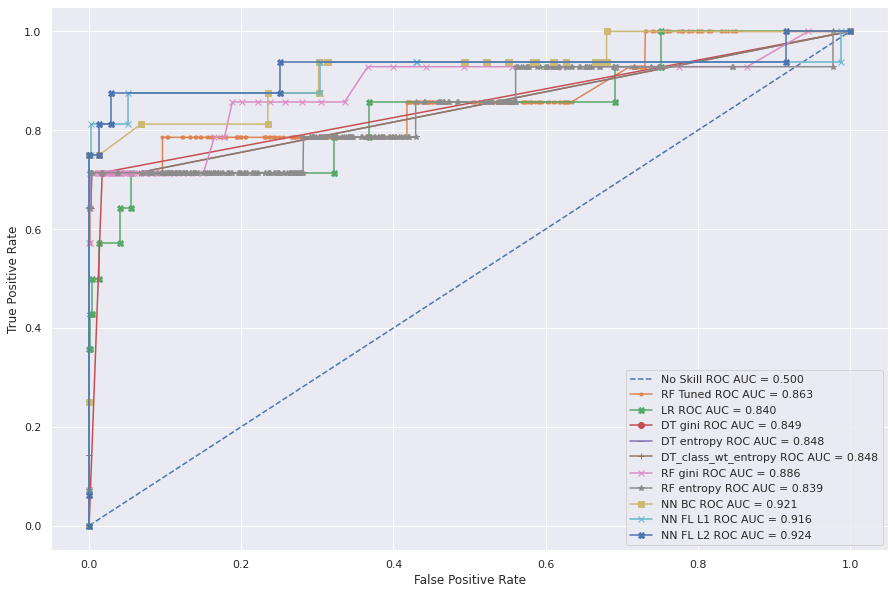

In [ ]:
from matplotlib import pyplot
# plot the roc curve for the model
plt.figure(figsize=(15,10))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill ROC AUC = %0.3f' % ns_roc_auc)
pyplot.plot(rfcnew_fpr, rfcnew_tpr, marker='.', label='RF Tuned ROC AUC = %0.3f' % rfcnew_roc_auc)
pyplot.plot(lr_fpr, lr_tpr, marker='X', label='LR ROC AUC = %0.3f' % lr_roc_auc)
pyplot.plot(dt_fpr, dt_tpr, marker='o', label='DT gini ROC AUC = %0.3f' % dt_roc_auc)
pyplot.plot(dt1_fpr, dt1_tpr, marker='_', label='DT entropy ROC AUC = %0.3f' % dt1_roc_auc)
pyplot.plot(dt2_fpr, dt2_tpr, marker='+', label='DT_class_wt_entropy ROC AUC = %0.3f' % dt2_roc_auc)
pyplot.plot(rfc_fpr, rfc_tpr, marker='x', label='RF gini ROC AUC = %0.3f' % rfc_roc_auc)
pyplot.plot(rfc1_fpr, rfc1_tpr, marker='*', label='RF entropy ROC AUC = %0.3f' % rfc1_roc_auc)
pyplot.plot(nn_bc_l1_fpr, nn_bc_l1_tpr, marker='s', label='NN BC ROC AUC = %0.3f' % nn_bc_l1_roc_auc)
pyplot.plot(nn_fl_l1_fpr, nn_fl_l1_tpr, marker='x', label='NN FL L1 ROC AUC = %0.3f' % nn_fl_l1_roc_auc)
pyplot.plot(nn_fl_l2_fpr, nn_fl_l2_tpr, marker='X', label='NN FL L2 ROC AUC = %0.3f' % nn_fl_l2_roc_auc)
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### 13.3 Probability Value comparison of test dataset among all models                                          

In [ ]:
prediction_final = nn_fl_l1.predict_classes(df_testX, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
predictions_nn=pd.DataFrame(prediction_final,columns=['outcome'])
predictions_nn.head(3)

,outcome
0,0
1,0
2,0


In [ ]:
a = pd.DataFrame(nn_fl_l1.predict(df_testX, verbose=0),columns=['proba_nn_fl_l1'])
a

,proba_nn_fl_l1
0,0.151677
1,0.140195
2,0.116401
3,0.136163
4,0.151042
...,...
1752,0.100395
1753,0.112015
1754,0.154338
1755,0.116290


In [ ]:
predictions_nn=predictions_nn.join(a, lsuffix="_left", rsuffix="_right")
predictions_nn.head(3)

,outcome,proba_nn_fl_l1
0,0,0.151677
1,0,0.140195
2,0,0.116401


In [ ]:
matrix_proba=predictions_nn.copy()
matrix_proba.head(3)

,outcome,proba_nn_fl_l1
0,0,0.151677
1,0,0.140195
2,0,0.116401


In [ ]:
a1 = pd.DataFrame(rfcnew_probs,columns=['proba_RFTuned'])
a2 = pd.DataFrame(lr_probs,columns=['proba_Logreg'])
a3 = pd.DataFrame(dt_probs,columns=['proba_DTGini'])
a4 = pd.DataFrame(dt1_probs,columns=['proba_DTEntropy'])
a5 = pd.DataFrame(rfc_probs,columns=['proba_RFGini'])
a6 = pd.DataFrame(rfc1_probs,columns=['proba_RFEntropy'])
a7 = pd.DataFrame(dt2_probs,columns=['proba_DT_weighted'])
a8 = pd.DataFrame(nn_bc_probs,columns=['proba_nn_bc'])
a9 = pd.DataFrame(nn_fl_l2_probs,columns=['proba_nn_fl_l2'])

In [ ]:
ais = [a1,a2,a3,a4,a5,a6,a7,a8,a9]
for a in ais:
  matrix_proba=matrix_proba.join(a, lsuffix="_left", rsuffix="_right")
matrix_proba.head(3)

,outcome,proba_nn_fl_l1,proba_RFTuned,proba_Logreg,proba_DTGini,proba_DTEntropy,proba_RFGini,proba_RFEntropy,proba_DT_weighted,proba_nn_bc,proba_nn_fl_l2
0,0,0.151677,0.000000,0.373555,0.0,0.117082,0.000000,0.215838,0.117082,0.009569,0.225493
1,0,0.140195,0.005952,0.153145,0.0,0.117082,0.003333,0.232243,0.117082,0.002352,0.138977
2,0,0.116401,0.010317,0.314247,0.0,0.117082,0.010000,0.206939,0.117082,0.000013,0.063722


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

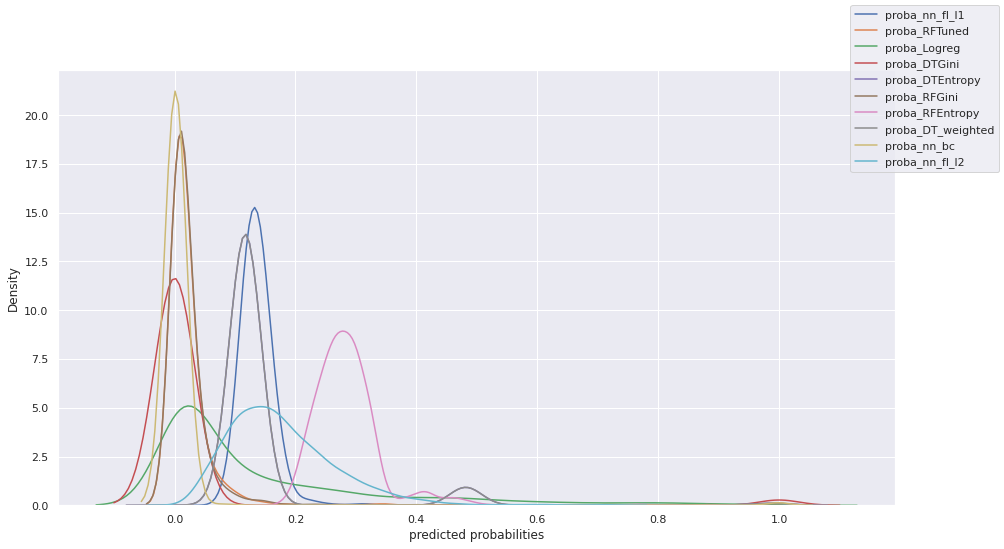

In [ ]:
columns = matrix_proba.columns.tolist()
lgnds=[]
for c in columns:
    if c != 'outcome':
      lgnds.append(c)
fig = plt.figure(figsize=(15,8))
for p in range(2,12,1):
  sns.distplot(matrix_proba.iloc[:,p-1:p],hist=False,kde =True, axlabel= 'predicted probabilities')
fig.legend(labels=lgnds)
plt.show()

### 14. Cross Validation and Prediction with selected model

In [ ]:
train_df= df_trainX.join(df_trainy,lsuffix="_left", rsuffix="_right")
train_df.head(3)

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Operator_Operator2,Operator_Operator3,Operator_Operator4,Operator_Operator5,Operator_Operator6,Operator_Operator7,Operator_Operator8,Target_label_encoded
488,-0.350941,0.335764,-0.153911,0.453078,1.215645,0.776733,-0.879174,0.873832,-0.599725,-0.870544,-0.168632,-1.476123,-0.642219,-1.004962,-0.113613,-0.746408,1.584827,0.812920,1,0,0,0,0,0,0,0
5249,0.679447,1.971125,0.498026,-1.340601,1.215645,0.025265,1.145664,-0.746733,-0.447445,-1.399701,-0.277086,-0.393946,0.592432,-1.293086,-1.125600,1.267472,-1.537733,-0.562866,0,0,0,0,0,0,1,0
3552,0.679447,-0.686336,1.162965,0.453078,1.215645,1.001801,0.586120,-1.437250,1.209068,-1.008423,0.594284,-0.631315,-0.528107,-1.543546,-0.585128,0.061009,-0.754295,1.049898,1,0,0,0,0,0,0,0


In [ ]:
100* (train_df.Target_label_encoded[train_df.Target_label_encoded==1].count() / train_df.shape[0])

0.9250035577059912

In [ ]:
#random split the train_df
dfs=[]
n_split=5
for split in range(n_split):
  dfs.append(train_df.sample(frac=1/n_split,random_state=31*split))

In [ ]:
for i in range(len(dfs)):
  print(f'Set {i} - Ratio : {100* (dfs[i].Target_label_encoded[dfs[i].Target_label_encoded==1].count() / dfs[i].shape[0])}')

Set 0 - Ratio : 0.8540925266903915
Set 1 - Ratio : 0.6405693950177936
Set 2 - Ratio : 0.7117437722419928
Set 3 - Ratio : 1.4234875444839856
Set 4 - Ratio : 0.42704626334519574


In [ ]:
dfs[2].shape

(1405, 26)

In [ ]:
dfs[2]['Target_label_encoded'][dfs[2]['Target_label_encoded']==1].count()

10

In [ ]:
recall_cv =[]
precision_cv=[]
for i in range(len(dfs)):
  features = dfs[i][col]
  target = dfs[i]['Target_label_encoded']
  model = models.load_model('best_model_fl_l1.h5',custom_objects={'focal_loss': focal_loss}, compile= True)
  model_probs= model.predict(features)
  model_probs= model_probs[:, 0]
  model_precision, model_recall, _ = precision_recall_curve(target, model_probs)
  recall_cv.append(model_recall)
  precision_cv.append(model_precision)

In [ ]:
print('Score per fold')
for i in range(0, len(recall_cv)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Recall: {np.mean(recall_cv[i])}')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Recall: {np.mean(np.mean(recall_cv[i]))} std: (+- {np.mean(np.std(recall_cv[i]))})')
print('------------------------------------------------------------------------')

Score per fold
------------------------------------------------------------------------
> Fold 1 - Recall: 0.8386319845857417
------------------------------------------------------------------------
> Fold 2 - Recall: 0.851851851851852
------------------------------------------------------------------------
> Fold 3 - Recall: 0.7843749999999999
------------------------------------------------------------------------
> Fold 4 - Recall: 0.8896428571428572
------------------------------------------------------------------------
> Fold 5 - Recall: 0.8218954248366014
------------------------------------------------------------------------
Average scores for all folds:
> Recall: 0.8218954248366014 std: (+- 0.08657047175784056)
------------------------------------------------------------------------


In [ ]:
prediction_finals = nn_fl_l1.predict_classes(df_testX, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
test_predictions = df_testX.copy()
test_predictions['actual'] = df_testy.Target_label_encoded
test_predictions['predicted'] = prediction_finals

In [ ]:
test_predictions

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Operator_Operator2,Operator_Operator3,Operator_Operator4,Operator_Operator5,Operator_Operator6,Operator_Operator7,Operator_Operator8,actual,predicted
5412,1.098370,0.813179,-1.335798,1.369168,1.267832,0.318688,0.108092,-0.727298,1.343247,-0.082581,-0.622898,0.047636,0.890168,1.036932,-1.296467,1.330755,0.111555,0.485502,0,1,0,0,0,0,0,0,0
1539,-0.388407,-0.272666,-0.195731,0.474217,1.267832,0.850712,-1.067862,1.009396,-0.793944,1.342784,0.178221,1.662228,-1.346279,0.123582,1.255133,-1.021571,-1.299758,1.359586,1,0,0,0,0,0,0,0,0
6651,-0.016712,1.899024,1.282969,1.369168,1.267832,-0.000902,0.859869,-1.685863,-1.620100,-0.865789,1.664384,-1.081118,0.677706,-0.507460,-1.631011,-0.808900,-0.498294,-0.130330,1,0,0,0,0,0,0,0,0
8326,-0.388407,-1.141343,-1.595417,-0.420734,-1.212771,-1.147667,-0.005527,0.719947,1.443952,-1.292656,1.179145,1.198307,-0.119960,1.352453,1.504623,0.838838,-1.176314,-0.507776,0,0,0,0,1,0,0,0,0
3964,-0.016712,0.161672,0.287763,-1.315685,0.027531,0.965389,-1.202311,-1.313715,1.098943,-0.598533,-1.545804,-0.323136,-1.309005,-0.479782,-1.525166,1.426919,0.702980,-0.209792,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,-1.131795,0.378841,-0.782696,-1.315685,-1.212771,1.452294,-1.024308,1.415377,1.197784,1.738100,-0.286086,-1.599833,-0.690254,-0.933690,-0.861750,-0.557394,1.661052,1.313233,0,0,0,1,0,0,0,0,0
6458,-0.388407,1.464686,-0.989639,-1.315685,0.027531,0.519842,0.399713,1.167277,1.451412,0.682068,-1.024410,-0.297566,1.438098,1.068300,1.691740,-1.618899,-0.724915,-1.408347,0,0,0,0,0,1,0,0,0
927,-1.131795,-1.792850,1.576452,0.474217,-1.212771,-0.982232,1.335174,1.479281,-0.219550,0.912205,-1.159515,-0.867422,-0.153507,0.505528,-0.060359,-0.385408,-0.214557,0.260359,1,0,0,0,0,0,0,0,0
3340,-1.503490,-0.489835,1.190786,1.369168,0.027531,0.937190,1.111724,-0.127725,-0.797673,0.927053,1.101127,-0.330442,-0.789031,-1.304565,-0.496966,-0.951297,0.686398,-0.375339,1,0,0,0,0,0,0,0,0


In [ ]:
ss = test_predictions.copy()

In [ ]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df

In [ ]:
ss = undummify(ss)

In [ ]:
ss

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Operator,actual,predicted
5412,1.098370,0.813179,-1.335798,1.369168,1.267832,0.318688,0.108092,-0.727298,1.343247,-0.082581,-0.622898,0.047636,0.890168,1.036932,-1.296467,1.330755,0.111555,0.485502,Operator3,0,0
1539,-0.388407,-0.272666,-0.195731,0.474217,1.267832,0.850712,-1.067862,1.009396,-0.793944,1.342784,0.178221,1.662228,-1.346279,0.123582,1.255133,-1.021571,-1.299758,1.359586,Operator2,0,0
6651,-0.016712,1.899024,1.282969,1.369168,1.267832,-0.000902,0.859869,-1.685863,-1.620100,-0.865789,1.664384,-1.081118,0.677706,-0.507460,-1.631011,-0.808900,-0.498294,-0.130330,Operator2,0,0
8326,-0.388407,-1.141343,-1.595417,-0.420734,-1.212771,-1.147667,-0.005527,0.719947,1.443952,-1.292656,1.179145,1.198307,-0.119960,1.352453,1.504623,0.838838,-1.176314,-0.507776,Operator6,0,0
3964,-0.016712,0.161672,0.287763,-1.315685,0.027531,0.965389,-1.202311,-1.313715,1.098943,-0.598533,-1.545804,-0.323136,-1.309005,-0.479782,-1.525166,1.426919,0.702980,-0.209792,Operator2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,-1.131795,0.378841,-0.782696,-1.315685,-1.212771,1.452294,-1.024308,1.415377,1.197784,1.738100,-0.286086,-1.599833,-0.690254,-0.933690,-0.861750,-0.557394,1.661052,1.313233,Operator5,0,0
6458,-0.388407,1.464686,-0.989639,-1.315685,0.027531,0.519842,0.399713,1.167277,1.451412,0.682068,-1.024410,-0.297566,1.438098,1.068300,1.691740,-1.618899,-0.724915,-1.408347,Operator7,0,0
927,-1.131795,-1.792850,1.576452,0.474217,-1.212771,-0.982232,1.335174,1.479281,-0.219550,0.912205,-1.159515,-0.867422,-0.153507,0.505528,-0.060359,-0.385408,-0.214557,0.260359,Operator2,0,0
3340,-1.503490,-0.489835,1.190786,1.369168,0.027531,0.937190,1.111724,-0.127725,-0.797673,0.927053,1.101127,-0.330442,-0.789031,-1.304565,-0.496966,-0.951297,0.686398,-0.375339,Operator2,0,0


In [ ]:
# Calculate scaled values and store them in a separate object
features_test = ss[col_names]
features_test = scaler_tst.inverse_transform(features_test.values)
rescaled_features_test = pd.DataFrame(features_test,index = ss.index, columns = col_names)
rescaled_features_test

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure
5412,67.0,87.0,393.0,3.000000e+00,2.0,1246.0,1141.0,705.0,1783.0,1021.0,750.0,1111.0,1568.0,1637.0,394.0,1824.0,1159.0,294.0
1539,63.0,82.0,999.0,2.000000e+00,2.0,1529.0,520.0,1629.0,637.0,1789.0,1171.0,1995.0,368.0,1142.0,1744.0,552.0,393.0,426.0
6651,64.0,92.0,1785.0,3.000000e+00,2.0,1076.0,1538.0,195.0,194.0,599.0,1952.0,493.0,1454.0,800.0,217.0,667.0,828.0,201.0
8326,63.0,78.0,255.0,1.000000e+00,0.0,466.0,1081.0,1475.0,1837.0,369.0,1697.0,1741.0,1026.0,1808.0,1876.0,1558.0,460.0,144.0
3964,64.0,84.0,1256.0,-2.220446e-16,1.0,1590.0,449.0,393.0,1652.0,743.0,265.0,908.0,388.0,815.0,273.0,1876.0,1480.0,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,61.0,85.0,687.0,-2.220446e-16,0.0,1849.0,543.0,1845.0,1705.0,2002.0,927.0,209.0,720.0,569.0,624.0,803.0,2000.0,419.0
6458,63.0,90.0,577.0,-2.220446e-16,1.0,1353.0,1295.0,1713.0,1841.0,1433.0,539.0,922.0,1862.0,1654.0,1975.0,229.0,705.0,8.0
927,61.0,75.0,1941.0,2.000000e+00,0.0,554.0,1789.0,1879.0,945.0,1557.0,468.0,610.0,1008.0,1349.0,1048.0,896.0,982.0,260.0
3340,60.0,81.0,1736.0,3.000000e+00,1.0,1575.0,1671.0,1024.0,635.0,1565.0,1656.0,904.0,667.0,368.0,817.0,590.0,1471.0,164.0


In [ ]:
ds = rescaled_features_test.copy()

In [ ]:
ds.Measure2.min()

-2.220446049250313e-16

In [ ]:
ds.loc[ds.Measure2 == ds.Measure2.min(), 'Measure2'] = 0

In [ ]:
test_predictions = ds.copy()
test_predictions['Operator'] = ss.Operator
test_predictions['actual'] = ss.actual
test_predictions['predicted'] = ss.predicted

In [ ]:
test_predictions

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Operator,actual,predicted
5412,67.0,87.0,393.0,3.0,2.0,1246.0,1141.0,705.0,1783.0,1021.0,750.0,1111.0,1568.0,1637.0,394.0,1824.0,1159.0,294.0,Operator3,0,0
1539,63.0,82.0,999.0,2.0,2.0,1529.0,520.0,1629.0,637.0,1789.0,1171.0,1995.0,368.0,1142.0,1744.0,552.0,393.0,426.0,Operator2,0,0
6651,64.0,92.0,1785.0,3.0,2.0,1076.0,1538.0,195.0,194.0,599.0,1952.0,493.0,1454.0,800.0,217.0,667.0,828.0,201.0,Operator2,0,0
8326,63.0,78.0,255.0,1.0,0.0,466.0,1081.0,1475.0,1837.0,369.0,1697.0,1741.0,1026.0,1808.0,1876.0,1558.0,460.0,144.0,Operator6,0,0
3964,64.0,84.0,1256.0,0.0,1.0,1590.0,449.0,393.0,1652.0,743.0,265.0,908.0,388.0,815.0,273.0,1876.0,1480.0,189.0,Operator2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4194,61.0,85.0,687.0,0.0,0.0,1849.0,543.0,1845.0,1705.0,2002.0,927.0,209.0,720.0,569.0,624.0,803.0,2000.0,419.0,Operator5,0,0
6458,63.0,90.0,577.0,0.0,1.0,1353.0,1295.0,1713.0,1841.0,1433.0,539.0,922.0,1862.0,1654.0,1975.0,229.0,705.0,8.0,Operator7,0,0
927,61.0,75.0,1941.0,2.0,0.0,554.0,1789.0,1879.0,945.0,1557.0,468.0,610.0,1008.0,1349.0,1048.0,896.0,982.0,260.0,Operator2,0,0
3340,60.0,81.0,1736.0,3.0,1.0,1575.0,1671.0,1024.0,635.0,1565.0,1656.0,904.0,667.0,368.0,817.0,590.0,1471.0,164.0,Operator2,0,0


In [ ]:
test_predictions.to_csv('test_predictions.csv')

In [ ]:
from google.colab import files
files.download("test_predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### 15. Conclusion

- Model for binary classification with <1% minority class (“Yes” or “1”) has been built well with the help of SMOTE oversampling technique and Neural Network with Focal Loss as Loss function.

- Neural Network performs best.

- “Recall” achieved on test data set as 0.75 and 0.82 on validation set.

- This case study can also be referred and used for similar type binary classification problem.
